# Question 1
## Part a.

In [1]:
import pandas as pd
filename = 'US_data.txt'
df = pd.read_csv(filename,delim_whitespace = True,parse_dates = True,index_col = 'Quarter')

In [2]:
df.head()

,PCEC,GDP,IRLTLT01USQ156N,GPDI
Quarter,,,,
1960-01-01,326.364,542.648,4.486667,96.476
1960-04-01,332.208,541.080,4.260000,87.096
1960-07-01,332.126,545.604,3.833333,86.377
1960-10-01,334.024,540.197,3.886667,75.963
1961-01-01,334.520,545.018,3.786667,78.378


In [3]:
from sympy import *
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
%matplotlib inline
init_printing(use_latex = True)
from matplotlib import rcParams
import pandas as pd
import pandas_datareader as pdr
import datetime
import numpy as np
plt.style.use('fivethirtyeight')
#Seting font style and size 
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
import math
from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import OLSInfluence



/Users/adityavenkatraman/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## part b.

Text(0.5, 0, 'Investment')

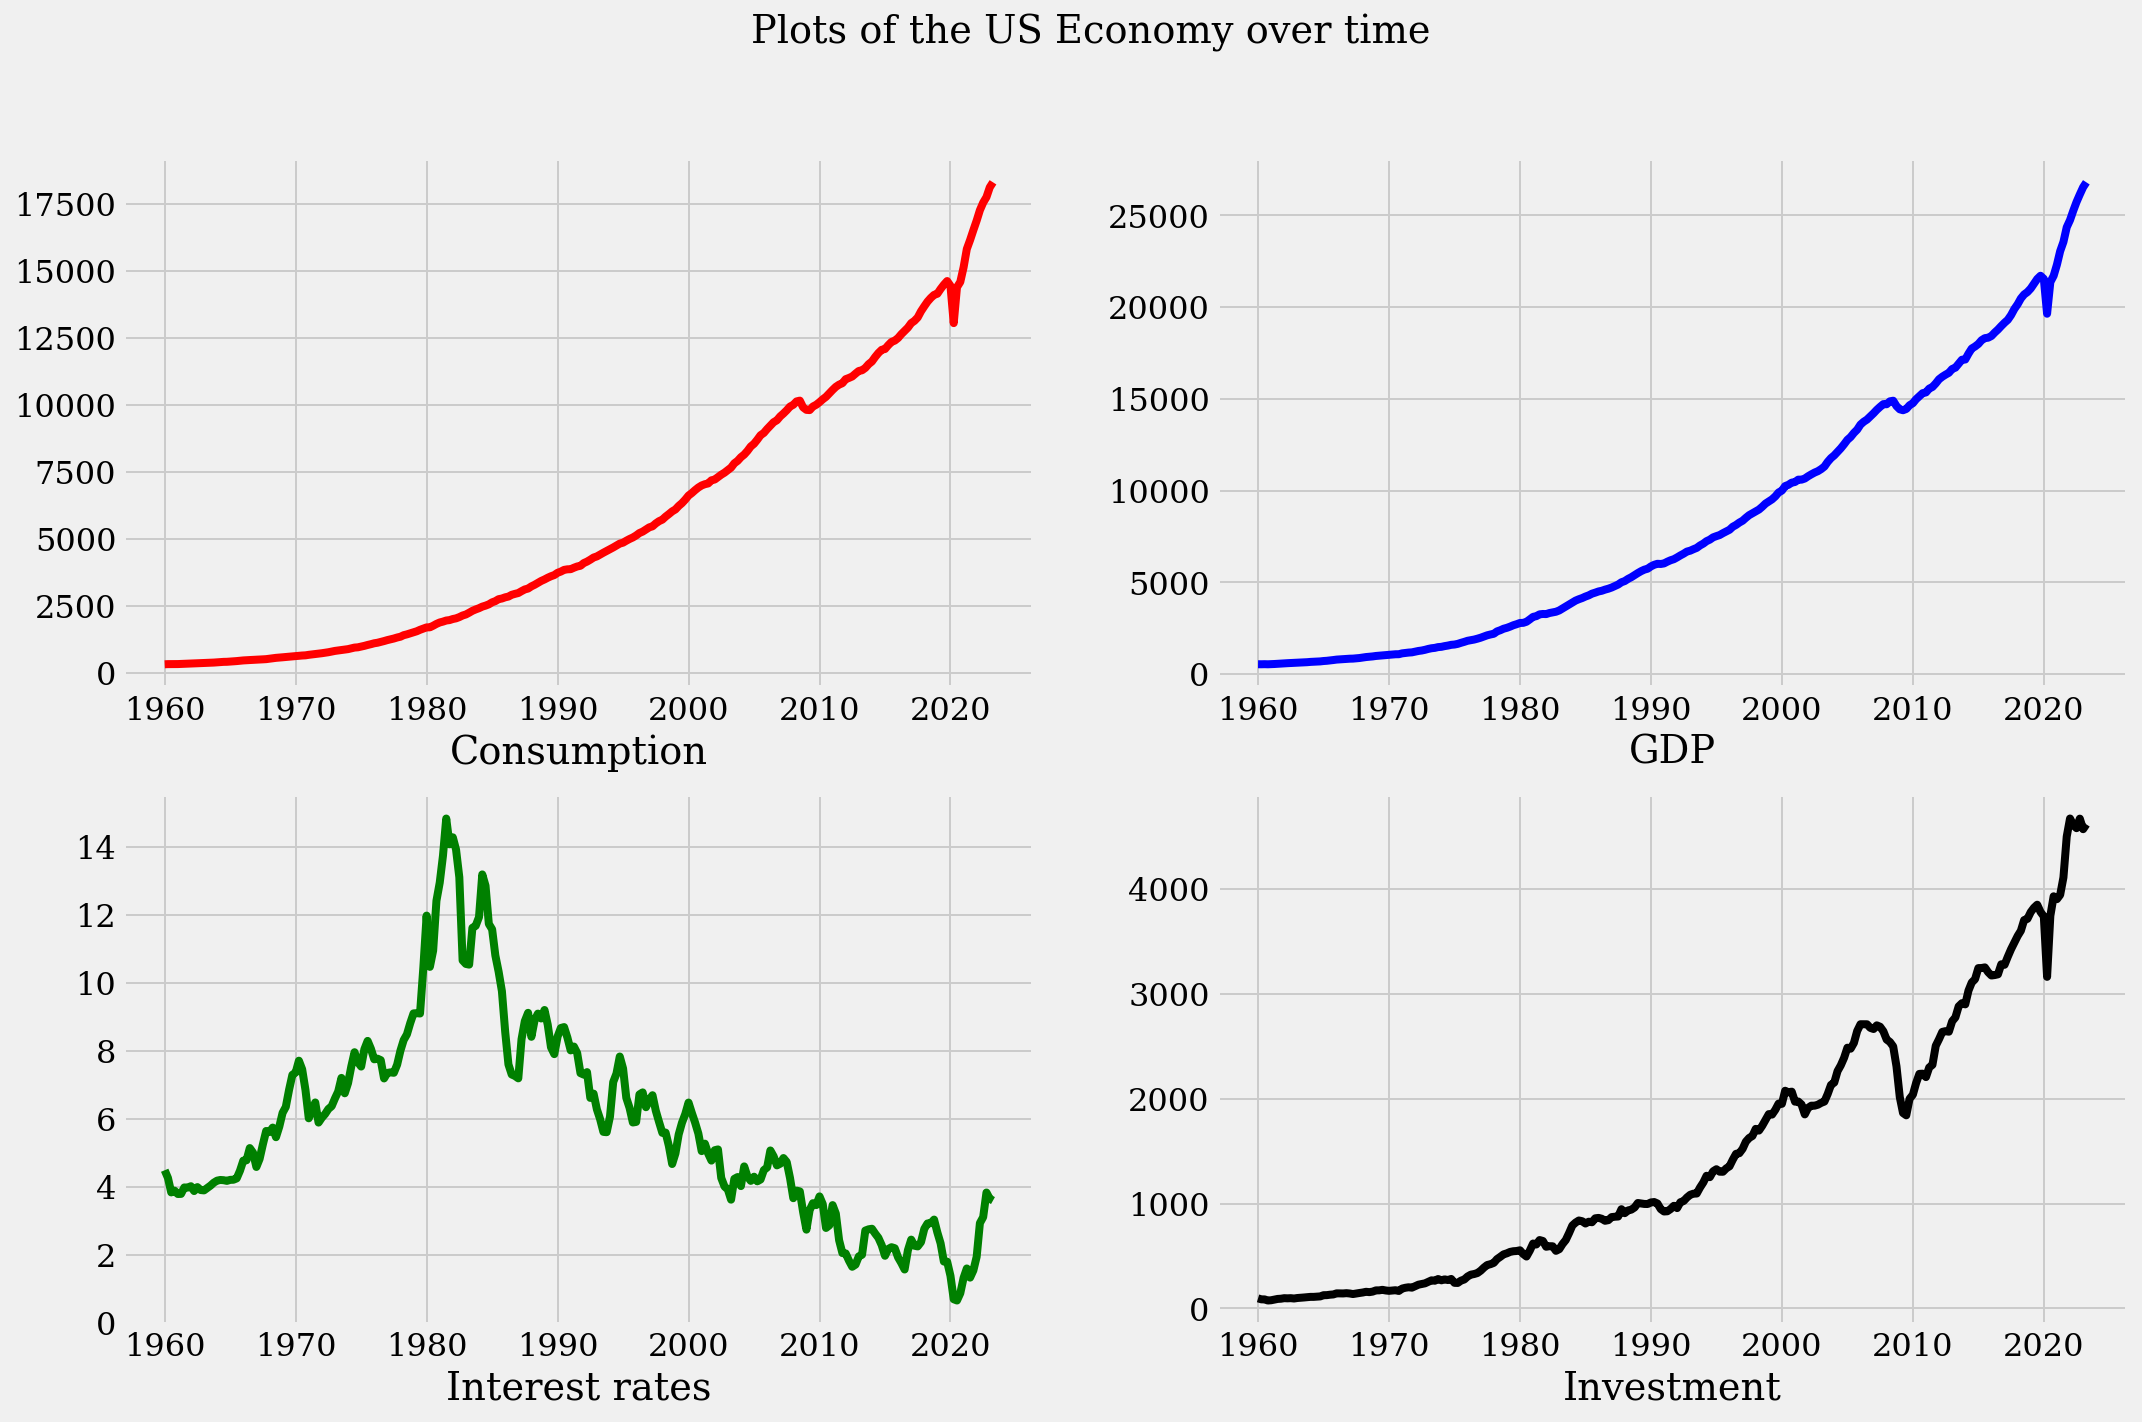

In [4]:
x = df.index
PCEC = df['PCEC']
GDP = df['GDP']
IRLTLT01USQ156N = df['IRLTLT01USQ156N']
GPDI = df['GPDI']

fig,ax = plt.subplots(2,2,sharey = False,sharex = False, figsize = (16,10))
fig.suptitle("Plots of the US Economy over time")
ax[0,0].plot(x,PCEC,color = 'red',linestyle = '-',linewidth = 4)
ax[0,1].plot(x,GDP,color = 'blue',linestyle = '-',linewidth = 4)
ax[1,0].plot(x,IRLTLT01USQ156N,color = 'green',linestyle = '-',linewidth = 4)
ax[1,1].plot(x,GPDI,color = 'black',linestyle = '-',linewidth = 4)
ax[0,0].set_xlabel('Consumption')
ax[0,1].set_xlabel('GDP')
ax[1,0].set_xlabel('Interest rates')
ax[1,1].set_xlabel('Investment')


Comsumption took a bit of a dip in the begining of 2020, but then bounced back.This could be explained by the stimulus cheques provided during the 2020 lockdown conditions, and the expansionary monetary polciy pursued by the Federal Reserve in that year.

GDP shows a similar trend, which could be explained by the CARES stimulus bill passed under the Trump administration in 2020, combined with expansionary monetary polciy

Interest rates dipped to close-to-zero values, which was in addition to the $700B QE program the Fed undertook from Feb to April 2020. The sharp raise in rates from there on are presumably in response to the inflation that increasing the money supply to that extent caused


Investment took 2 noticeable dips, the first right before 2010 (presumably 2008), and one in 2020. These were presumably in response to the stock market crashes at the time. The relatively quick recovery from these dips can be explained in part by government bailouts and tax write offs to major financial institutions 


## part c.

In [5]:
X = df[['GDP','IRLTLT01USQ156N']]
X = sm.add_constant(X)
Y = df['PCEC']
model1 = sm.OLS(Y,X)
results1 = model1.fit()
print(results1.summary())
print('Parameters: ', results1.params)
print('R2: ', results1.rsquared)


                            OLS Regression Results                            
Dep. Variable:                   PCEC   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.269e+05
Date:                Mon, 26 Feb 2024   Prob (F-statistic):               0.00
Time:                        12:03:00   Log-Likelihood:                -1459.0
No. Observations:                 254   AIC:                             2924.
Df Residuals:                     251   BIC:                             2935.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              19.4708     18.219     

The R^2 of 1 strongly implies spurious regression, and that consumption is non stationary



GDP has an associated coefficient of 0.6789 with consumption(1 billion USD rise in GDP will cause an 678.9 million USD rise in comsumption)

Consumption and interest rates look to be negatively correlated, with a 1 percent rise in rates cause a 23.2781 billion USD fall in consumption. 






In [6]:
X = df['IRLTLT01USQ156N']
X = sm.add_constant(X)
Y = df['GPDI']
model2 = sm.OLS(Y,X)
results2 = model2.fit()
print(results2.summary())
print('Parameters: ', results2.params)
print('R2: ', results2.rsquared)

                            OLS Regression Results                            
Dep. Variable:                   GPDI   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     146.9
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           6.08e-27
Time:                        12:03:00   Log-Likelihood:                -2112.7
No. Observations:                 254   AIC:                             4229.
Df Residuals:                     252   BIC:                             4236.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2958.9588    138.393     

The R^2 of 0.368 implies that approximately 37% of variation in Investment can be explained by Interest Rates.

Interest rates and Investment are negatively correlated, with a 1 percent rise in Interest rates causing a -256.8835 billion USD drop in Investment.

The constant of 2958 implies that at an interest rate of 0, Investment would be about 2.9 Trillion USD



## part d.

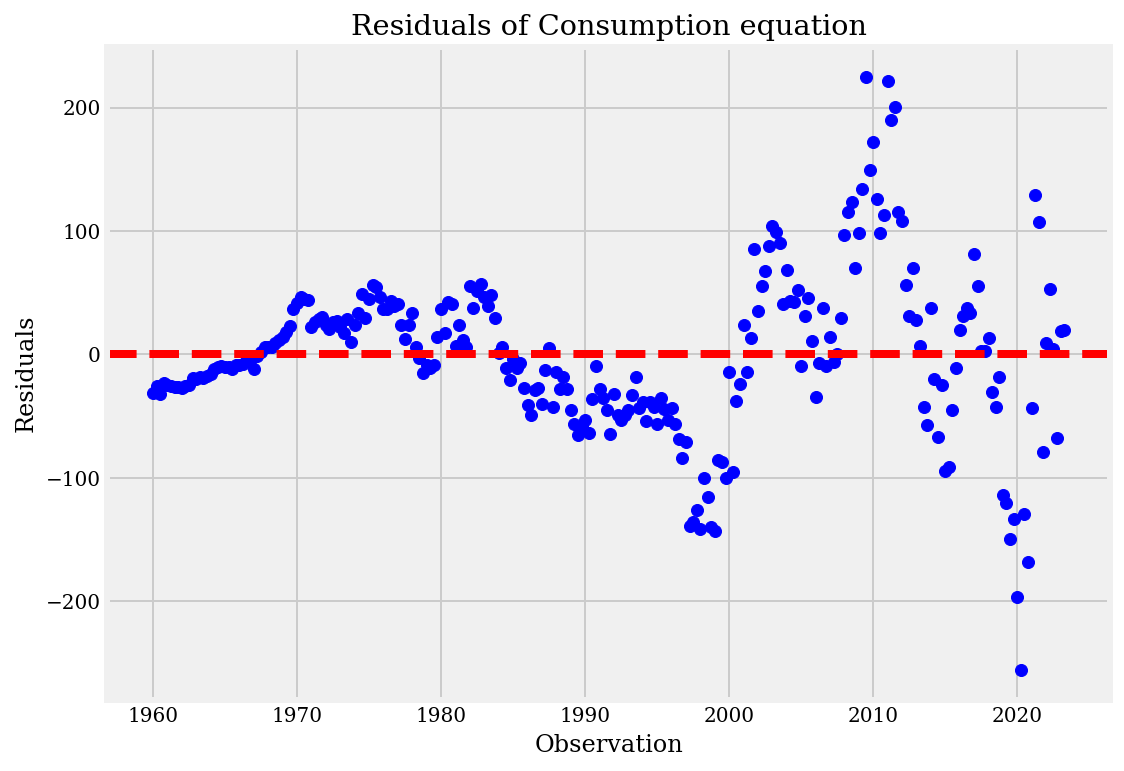

In [73]:
resid1 = results1.resid
resid2 = results2.resid
plt.figure(figsize=(8, 6))
plt.scatter(df.index, resid1, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals of Consumption equation')
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

The residuals are nonstationary, which is consistent with the r^2 of 1 implying spurious regression. The trend change from period to period is random, implying a possible stochastic trend. 


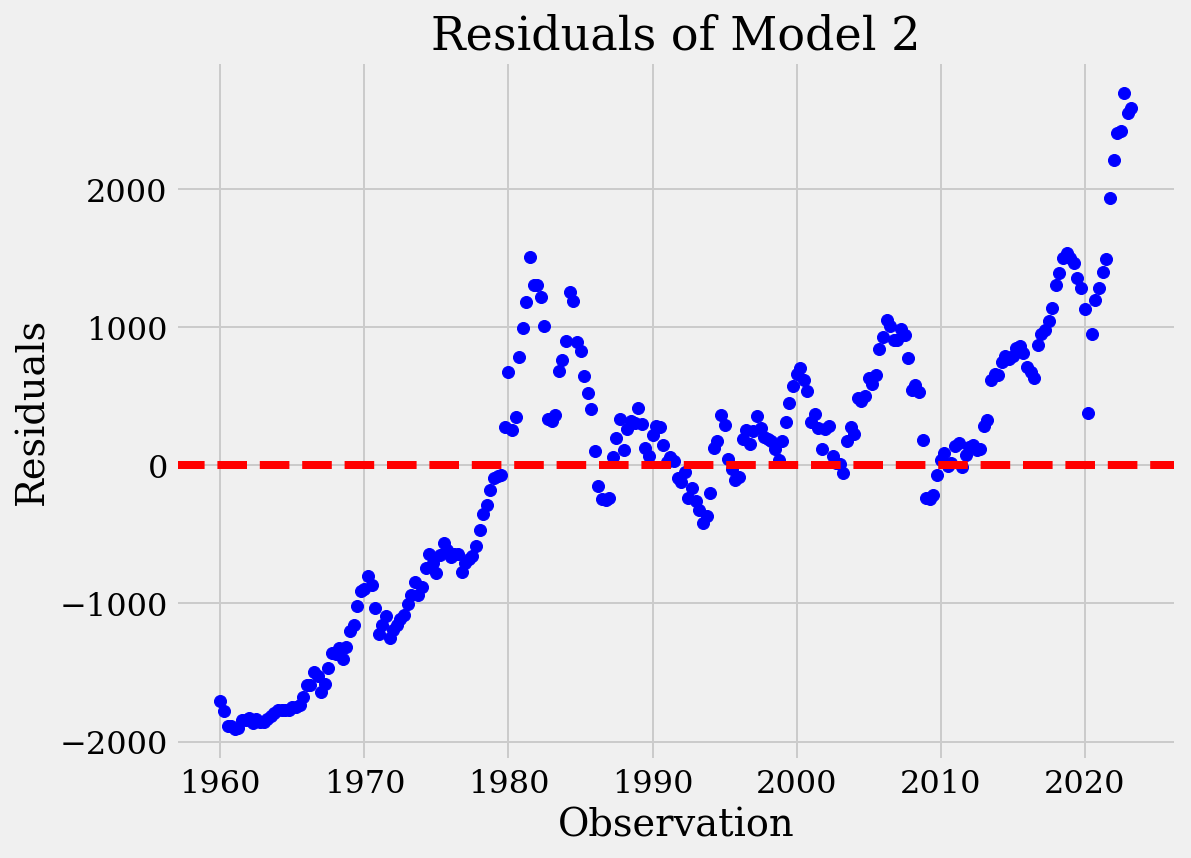

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(df.index, resid2, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals of Investment equation')
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

The residuals are nonstationary, implying spurious regression

## part e.

In [9]:
df['time'] = np.arange(1, len(df) + 1)
X = df[['GDP','IRLTLT01USQ156N', 'time']]
X = sm.add_constant(X)
Y = df['PCEC']
model1 = sm.OLS(Y,X)
results1 = model1.fit()
print(results1.summary())
print('Parameters: ', results1.params)
print('R2: ', results1.rsquared)


                            OLS Regression Results                            
Dep. Variable:                   PCEC   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.609e+05
Date:                Mon, 26 Feb 2024   Prob (F-statistic):               0.00
Time:                        12:03:03   Log-Likelihood:                -1424.0
No. Observations:                 254   AIC:                             2856.
Df Residuals:                     250   BIC:                             2870.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              35.5065     16.008     

R^2 of 1 is implying spurious regression. The time trend might be affecting the estimation outputs, strong indications of non-stationarity in the Consumption time series

In [10]:
df['time'] = np.arange(1, len(df) + 1)
X = df[['IRLTLT01USQ156N','time']]
X = sm.add_constant(X)
Y = df['GPDI']
model3 = sm.OLS(Y,X)
results3 = model3.fit()
print(results3.summary())
print('Parameters: ', results3.params)
print('R2: ', results3.rsquared)

                            OLS Regression Results                            
Dep. Variable:                   GPDI   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     1873.
Date:                Mon, 26 Feb 2024   Prob (F-statistic):          1.39e-151
Time:                        12:03:03   Log-Likelihood:                -1819.5
No. Observations:                 254   AIC:                             3645.
Df Residuals:                     251   BIC:                             3656.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              28.9077     75.411     

Similar behaviours to consumption. The time variable might be driving up estimation values

## part f.

In [11]:
df['time'] = np.arange(1, len(df) + 1)
X = df[['IRLTLT01USQ156N','time','GDP']]
X = sm.add_constant(X)
Y = df['GPDI']
model4 = sm.OLS(Y,X)
results4 = model4.fit()
print(results4.summary())
print('Parameters: ', results4.params)
print('R2: ', results4.rsquared)

                            OLS Regression Results                            
Dep. Variable:                   GPDI   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     6342.
Date:                Mon, 26 Feb 2024   Prob (F-statistic):          1.64e-235
Time:                        12:03:03   Log-Likelihood:                -1619.1
No. Observations:                 254   AIC:                             3246.
Df Residuals:                     250   BIC:                             3260.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -80.4341     34.520     

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


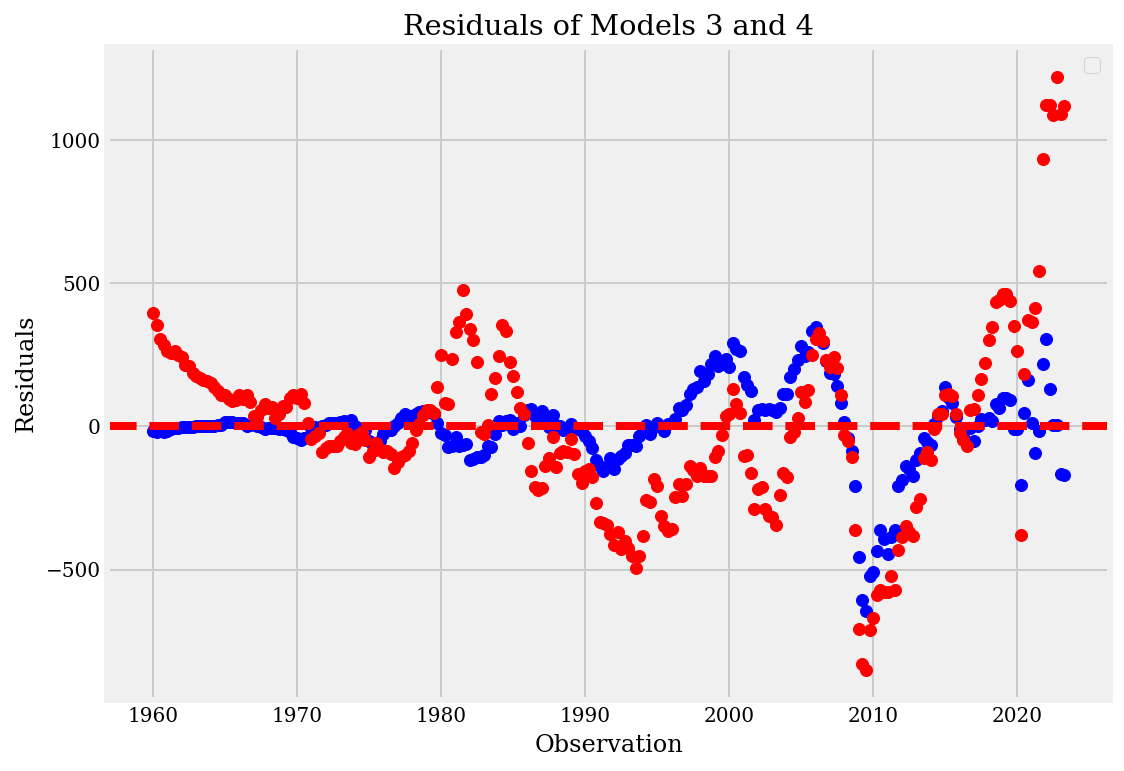

In [74]:
resid4 = results4.resid
resid3 = results3.resid
plt.figure(figsize=(8, 6))
plt.scatter(df.index, resid4, color='blue')
plt.scatter(df.index,resid3,color = 'red')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals of Models 3 and 4')
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()


Residuals of Investment over interest rates and time are in red (Model 3)

Residuals of Investment over Interest rates, time and GDP are in blue (Model 4).

Model 4 is demonstrating mean reversion, but the r^2 value implies that this might be inaccurate. Time might be a nonstationary series, which is causing inaccruate model predictions.



# Question 2

In [13]:
from sympy import *
%matplotlib inline
init_printing(use_latex = True)
import sympy as sym
import numpy as np

sym.init_printing(use_latex=True)

import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 


mpl.rcParams['figure.dpi'] = 80
# for better picture quality
%config InlineBackend.figure_format = 'retina'

plt.style.use('fivethirtyeight')


In [14]:
Y,C,I,r = symbols('Y C I r')
Gbar, Cbar, Ibar, Tbar, Mbar, Pbar = symbols('Gbar Cbar Ibar Tbar Mbar Pbar')
c, b, k, h,s = symbols('c b k h s')



In [15]:
consumption_function=sym.Eq(C,Cbar+c*(Y-Tbar)+s*r)
display(consumption_function)

investment_function = sym.Eq(I,Ibar + b * r)
display(investment_function)

demand_function = sym.Eq(Y, C+I+Gbar)
display(demand_function)



In [16]:
ISsol = sym.solve([demand_function,consumption_function,investment_function],[Y,C,I])
ISsol

## part a.

In [17]:
c = 0.703694
b = -76.403354
s = -12.751094
k = 0.6
h = 2700
Gbar = 150
Cbar = 55
Ibar = 200
Tbar = 150
Mbar = 200
Pbar = 1

import numpy as np
#A, vector of endogenous variables
A = np.array([ [1, -1, -1, 0], # Y=C+I+G 
     [-c, 1, 0, -s], # C=C_bar+c(Y−T) 
     [0, 0, 1, b], # I=I_bar−br 
     [k, 0, 0, -h] ]) # M/P=kY−hr


# d, vector of the exogenous variables 
d = np.array([ Gbar , Cbar - c*Tbar , Ibar , Mbar/Pbar ] )


In [18]:
import scipy
import scipy.linalg

In [19]:
P, L ,U = scipy.linalg.lu(A)

In [20]:
x = scipy.linalg.inv(U)@(scipy.linalg.inv(L)@ P@d) # solution of the linear system

In [21]:
x

array([1.04454855e+03, 6.82473161e+02, 2.12075384e+02, 1.58047825e-01])

In [22]:
x = scipy.linalg.solve(A, d) # solution of the linear system using the SciPy solver
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html
x

array([1.04454855e+03, 6.82473161e+02, 2.12075384e+02, 1.58047825e-01])

In [23]:
print(" IS-LM model: closed economy \
      \n-----------------------------------------------------------\
      \nexogenous variables: \nG = 200; T = 110; M = 200; P = 1     \
      \nproduction, Y = {0:.2f}，\
      \nconsumption, C = {1:.2f}, \
      \ninvestment, I = {2:.2f}，\
      \ninterest rate (%), r = {3:.2f}".format(x[0],x[1],x[2],x[3]*100 ))

 IS-LM model: closed economy       
-----------------------------------------------------------      
exogenous variables: 
G = 200; T = 110; M = 200; P = 1           
production, Y = 1044.55，      
consumption, C = 682.47,       
investment, I = 212.08，      
interest rate (%), r = 15.80


The government of this economy spends more than it receives in tax revenue.
Consumption makes approx 65% of this economy's GDP. 

In practice, consumers in an economy would be more averse to spending with an interest rate of 15.80%, with the incentive to save with interest rates like that is much higher.

Investment has a much more senstive response to interest rates, with I being approx 20% of GDP. This makes sense because the cost of capital at 15.8% interest is pretty high to encourage private investment. 

The money supply is equivalent to the public spending going on in this economy, which along with the fixed proce levels, suggests a highly planned economy.

Text(0.5, 1.0, 'IS LM old')

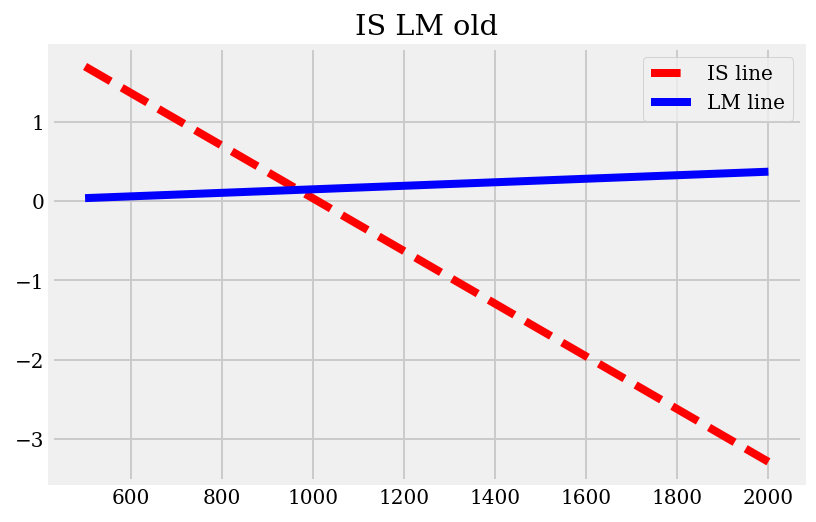

In [135]:
Y = np.linspace(500,2000) 
c = 0.703694
b = -76.403354
s = -12.751094
k = 0.6
h = 2700
Gbar = 150
Cbar = 55
Ibar = 200
Tbar = 150
Mbar = 200
Pbar = 1
    
# IS: I=Y−C−G and I=I_bar−br expressed in terms of r

IS = (Y -Cbar -c*(Y-Tbar)-Gbar-Ibar)/(b+s)

# LM: M_bar/P_bar=kY−hr expressed in terms of r

LM = 1/h*( k*Y-Mbar / Pbar )
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(num=1)
#The numbering, num, helps keeping the notebook organized
#plt.figure(num=10)
l1 = plt.plot(Y, IS , '--r', label='IS line')
l2 = plt.plot(Y, LM,  color='blue', linewidth=4.0, linestyle='-', label='LM line')
#plt.ylim((0.1, 0.2))

#plt.xlim((0.95*x[0],1.05*x[0]))
#plt.ylim((-0.4, 0.4))

plt.legend()
plt.title("IS LM old")


## part b.

### model with G = 160

In [122]:
c = 0.703694
b = -76.403354
s = -12.751094
k = 0.6
h = 2700
Gbar = 160
Cbar = 55
Ibar = 200
Tbar = 150
Mbar = 200
Pbar = 1

import numpy as np
#A, vector of endogenous variables
A = np.array([ [1, -1, -1, 0], # Y=C+I+G 
     [-c, 1, 0, -s], # C=C_bar+c(Y−T) 
     [0, 0, 1, b], # I=I_bar−br 
     [k, 0, 0, -h] ]) # M/P=kY−hr


# d, vector of the exogenous variables 
d = np.array([ Gbar , Cbar - c*Tbar , Ibar , Mbar/Pbar ] )
P, L ,U = scipy.linalg.lu(A)
x = scipy.linalg.inv(U)@(scipy.linalg.inv(L)@ P@d) # solution of the linear system
x = scipy.linalg.solve(A, d)
print(" IS-LM model: closed economy \
      \n-----------------------------------------------------------\
      \nexogenous variables: \nG = 160; T = 110; M = 200; P = 1     \
      \nproduction, Y = {0:.2f}，\
      \nconsumption, C = {1:.2f}, \
      \ninvestment, I = {2:.2f}，\
      \ninterest rate (%), r = {3:.2f}".format(x[0],x[1],x[2],x[3]*100 ))

 IS-LM model: closed economy       
-----------------------------------------------------------      
exogenous variables: 
G = 160; T = 110; M = 200; P = 1           
production, Y = 1079.99，      
consumption, C = 707.31,       
investment, I = 212.68，      
interest rate (%), r = 16.59


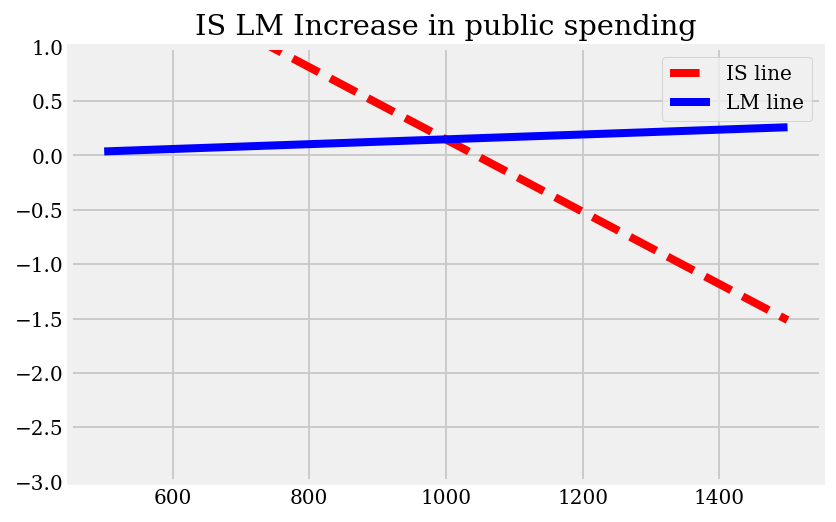

In [137]:
Y = np.linspace(500,1500)  
c = 0.703694
b = -76.403354
s = -12.751094
k = 0.6
h = 2700
Gbar = 160
Cbar = 55
Ibar = 200
Tbar = 150
Mbar = 200
Pbar = 1
    
# IS: I=Y−C−G and I=I_bar−br expressed in terms of r

IS = (Y -Cbar -c*(Y-Tbar)-Gbar-Ibar)/(b+s)

# LM: M_bar/P_bar=kY−hr expressed in terms of r

LM = 1/h*( k*Y-Mbar / Pbar )
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(num=1)
#The numbering, num, helps keeping the notebook organized
#plt.figure(num=10)
l1 = plt.plot(Y, IS , '--r', label='IS line')
l2 = plt.plot(Y, LM,  color='blue', linewidth=4.0, linestyle='-', label='LM line')
plt.ylim((-0.4, 0.4))
plt.title("IS LM Increase in public spending")

#plt.xlim((0.95*x[0],1.05*x[0]))
plt.ylim((-3,1))

plt.legend()


No significant change from an increase in public spending

### model with M = 210

In [67]:
c = 0.703694
b = -76.403354
s = -12.751094
k = 0.6
h = 2700
Gbar = 150
Cbar = 55
Ibar = 200
Tbar = 150
Mbar = 210
Pbar = 1

import numpy as np
#A, vector of endogenous variables
A = np.array([ [1, -1, -1, 0], # Y=C+I+G 
     [-c, 1, 0, -s], # C=C_bar+c(Y−T) 
     [0, 0, 1, b], # I=I_bar−br 
     [k, 0, 0, -h] ]) # M/P=kY−hr


# d, vector of the exogenous variables 
d = np.array([ Gbar , Cbar - c*Tbar , Ibar , Mbar/Pbar ] )
P, L ,U = scipy.linalg.lu(A)
x = scipy.linalg.inv(U)@(scipy.linalg.inv(L)@ P@d) # solution of the linear system
x = scipy.linalg.solve(A, d)
print(" IS-LM model: closed economy \
      \n-----------------------------------------------------------\
      \nexogenous variables: \nG = 150; T = 110; M = 210; P = 1     \
      \nproduction, Y = {0:.2f}，\
      \nconsumption, C = {1:.2f}, \
      \ninvestment, I = {2:.2f}，\
      \ninterest rate (%), r = {3:.2f}".format(x[0],x[1],x[2],x[3]*100 ))

 IS-LM model: closed economy       
-----------------------------------------------------------      
exogenous variables: 
G = 150; T = 110; M = 210; P = 1           
production, Y = 1043.71，      
consumption, C = 681.93,       
investment, I = 211.78，      
interest rate (%), r = 15.42


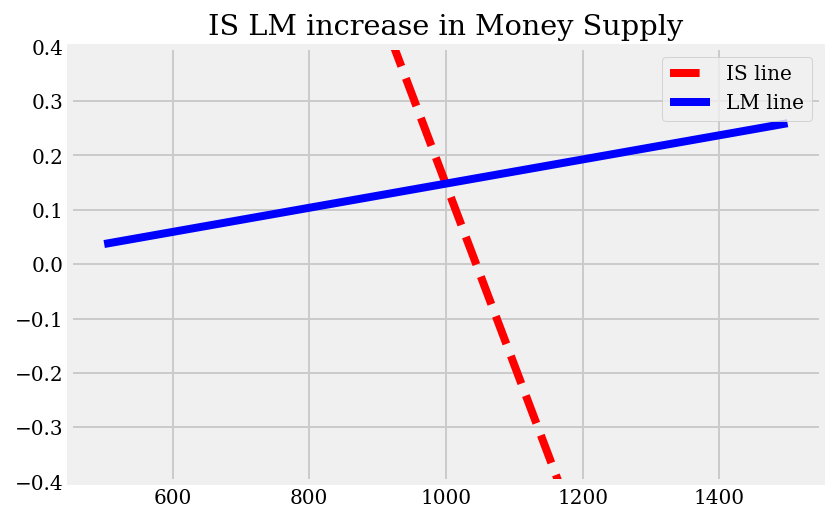

In [133]:
Y = np.linspace(500,1500) 
c = 0.703694
b = -76.403354
s = -12.751094
k = 0.6
h = 2700
Gbar = 150
Cbar = 55
Ibar = 200
Tbar = 150
Mbar = 210
Pbar = 1
    

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(num=1)
#The numbering, num, helps keeping the notebook organized
#plt.figure(num=10)
l1 = plt.plot(Y, IS , '--r', label='IS line')
l2 = plt.plot(Y, LM,  color='blue', linewidth=4.0, linestyle='-', label='LM line')
plt.ylim((-0.4, 0.4))

#plt.xlim((0.95*x[0],1.05*x[0]))
#plt.ylim((-0.4, 0.4))
plt.title("IS LM increase in Money Supply")
plt.legend()


No significant change from increasing the money supply. This economy is  inelastic to expansionary fiscal and monetary policy, atleast at these levels of increases

### part c

In [131]:
c = 0.703694
b = -76.403354
s = -12.751094
k = 0.6
h = 2700
Gbar = 150
Cbar = 55
Ibar = 200
Tbar = 150
Mbar = 210
Pbar = 1
q = 0.192421


import numpy as np
#A, vector of endogenous variables
A = np.array([ [1, -1, -1, 0], # Y=C+I+G 
     [-c, 1, 0, -s], # C=C_bar+c(Y−T) 
     [-q, 0, 1, b], # I=I_bar−br 
     [k, 0, 0, -h] ]) # M/P=kY−hr


# d, vector of the exogenous variables 
d = np.array([ Gbar , Cbar - c*Tbar , Ibar , Mbar/Pbar ] )
P, L ,U = scipy.linalg.lu(A)
x = scipy.linalg.inv(U)@(scipy.linalg.inv(L)@ P@d) # solution of the linear system
x = scipy.linalg.solve(A, d)
print(" IS-LM model: closed economy \
      \n-----------------------------------------------------------\
      \nexogenous variables: \nG = 150; T = 110; M = 210; P = 1     \
      \nproduction, Y = {0:.2f}，\
      \nconsumption, C = {1:.2f}, \
      \ninvestment, I = {2:.2f}，\
      \ninterest rate (%), r = {3:.2f}".format(x[0],x[1],x[2],x[3]*100 ))

 IS-LM model: closed economy       
-----------------------------------------------------------      
exogenous variables: 
G = 150; T = 110; M = 210; P = 1           
production, Y = 620.54，      
consumption, C = 385.35,       
investment, I = 85.19，      
interest rate (%), r = 6.01


In [ ]:
ishare= new_x[2]/new_x[0]
